# AS4501 Astroinformática - Tarea 1

## How much rain is too much

---

### Estudiante: Andrés Calderón

#### Pregunta Q1.1

Librerías a utilizar:

In [ ]:
%pip install numpy scipy astropy pandas matplotlib emcee xlrd openpyxl

Importamos los dataframes:

In [ ]:
import pandas as pd

hr_colorado = pd.read_csv("data/330077_HR.csv")
hr_serena = pd.read_csv("data/290004_HR.csv")
hr_calama = pd.read_csv("data/220002_HR.csv")
hr_tobalaba = pd.read_csv("data/330019_HR.csv")

Graficamos la función de densidad de probabilidad para cada zona:

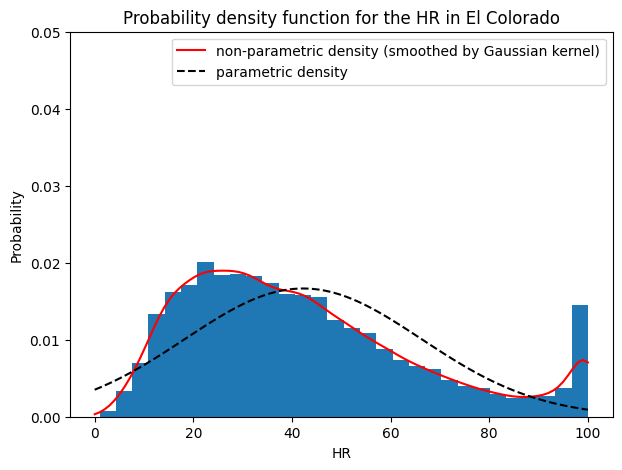

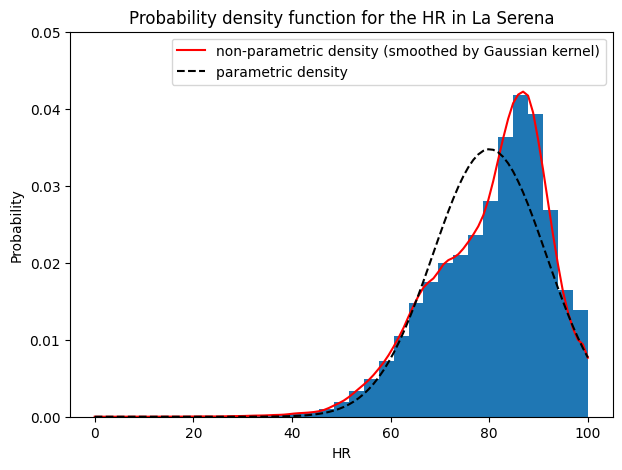

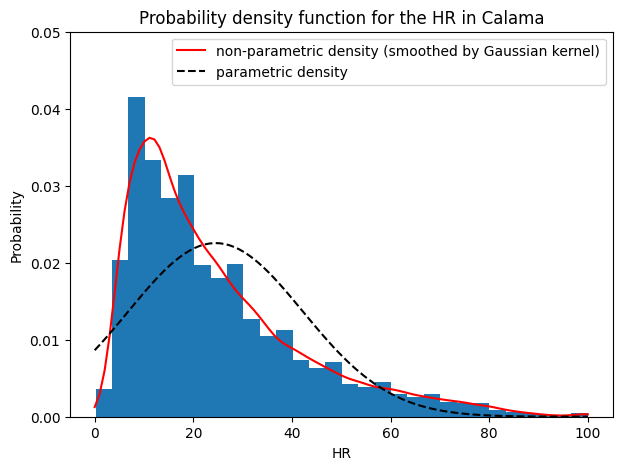

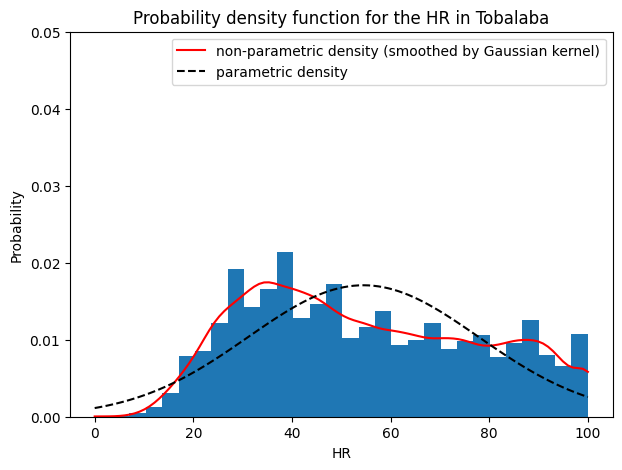

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

def plot_pdf(df, name):
    # non-parametric pdf
    nparam_density = stats.gaussian_kde(df["HR"])
    x = np.linspace(0, 100, 100)
    nparam_density = nparam_density(x)

    # parametric fit
    loc_param, scale_param = stats.norm.fit(df["HR"])
    param_density = stats.norm.pdf(x, loc=loc_param, scale=scale_param)

    # plots
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.hist(df["HR"], bins=30, density=True)
    ax.plot(x, nparam_density, 'r-', label='non-parametric density (smoothed by Gaussian kernel)')
    ax.plot(x, param_density, 'k--', label='parametric density')
    ax.set_ylim([0, 0.05])
    ax.set_title(f"Probability density function for the HR in {name}")
    ax.set_xlabel("HR")
    ax.set_ylabel("Probability")
    ax.legend(loc='best')

plot_pdf(hr_colorado, "El Colorado")
plot_pdf(hr_serena, "La Serena")
plot_pdf(hr_calama, "Calama")
plot_pdf(hr_tobalaba, "Tobalaba")

#### Pregunta Q1.2

Usaremos los datos disponibles en la estación de Quinta Normal desde 2012 hasta la fecha

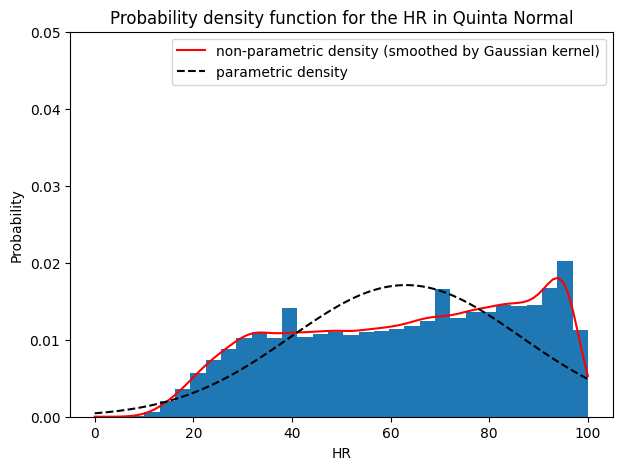

In [86]:
hr_quinta_normal = pd.read_csv("data/330020_HR.csv")

plot_pdf(hr_quinta_normal, "Quinta Normal")

Esta distribución es más parecida a la de Tobalaba, lo cual hace sentido pues son lugares cercanos.

#### Q2.1